**Understanding all formulas related to backpropagation and gradient descents**

> To learn is to repeatedly forward-backward passing through network. 

----
> Learing is made possible by weights update on all layers on each backward passing

----
> On each backward passing, we add $\Delta{w_{i,j}}$ to the weight $w_{i,j}$ of each node on each layer to another node of another layer. 

----
> Now we have weight updating formula: $w_{i,j} = w_{i,j} + \Delta{w_{i,j}}$ 

----
>To update weights is because we want our network to learn better or perform better, in other words, we want our network to predict with smaller error. 

----
> We update weights toward the purpose of minimizing prediction error. To do so, 
- first of all, we need a function to capture the relationship between weights and prediction error. Luckily, Sum Squared Error SSE did it for us. $E = \frac{1}{2}\sum_{j=0}^n (y_j - \hat{y_j})$ and $\hat{y_j} = f(\sum_{i=0}^n w_{i,j}x_i)$
- secondly, which is given as prior knowledge, that imagine we are at a particular point of the function curve on plot (equivalent to a particular value of $w_{i,j}$), the derivative of a function tell us which direction and how far away we are from the point we stand (or the current $w_{i,j}$ we have) to the optimal minimum point of the function, which is the minimum prediction error
- so, the weight updating formula can be written as $w_{i,j} \approx w_{i,j} + derivative(E)$ or $w_{i,j} \approx w_{i,j} + \frac{dE}{dw_{i,j}}$  and $\Delta{w_{i,j}} \approx \frac{dE}{dw_{i,j}}$. Note: $\approx not =$    
    
----    
> Now, we need to compute derivative of the prediction error $E = \frac{1}{2}\sum_{j=0}^n (y_j - \hat{y_j})$, and the result is $\frac{dE}{dw_{i,j}} = -(y_j - \hat{y_j}) * \frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i} * x_i$
- Let me try to expand the equation to show the process of taking derviate of SSE or Error:
    1. read the last paragraph, we will know that the forward-backward pass are repeated for every and each single data point, therefore, the same E now looks like this $E = \frac{1}{2}(y_j - \hat{y_j})^2$  
    2. Now we can take derviative: $$\frac{dE}{dw_{i,j}} = \frac{d\frac{1}{2}(y_j - \hat{y_j})^2}{d(y_j - \hat{y_j})} * \frac{d(y_j - \hat{y_j})}{dw_{i,j}} = $$ the rest of the equation see image below: 

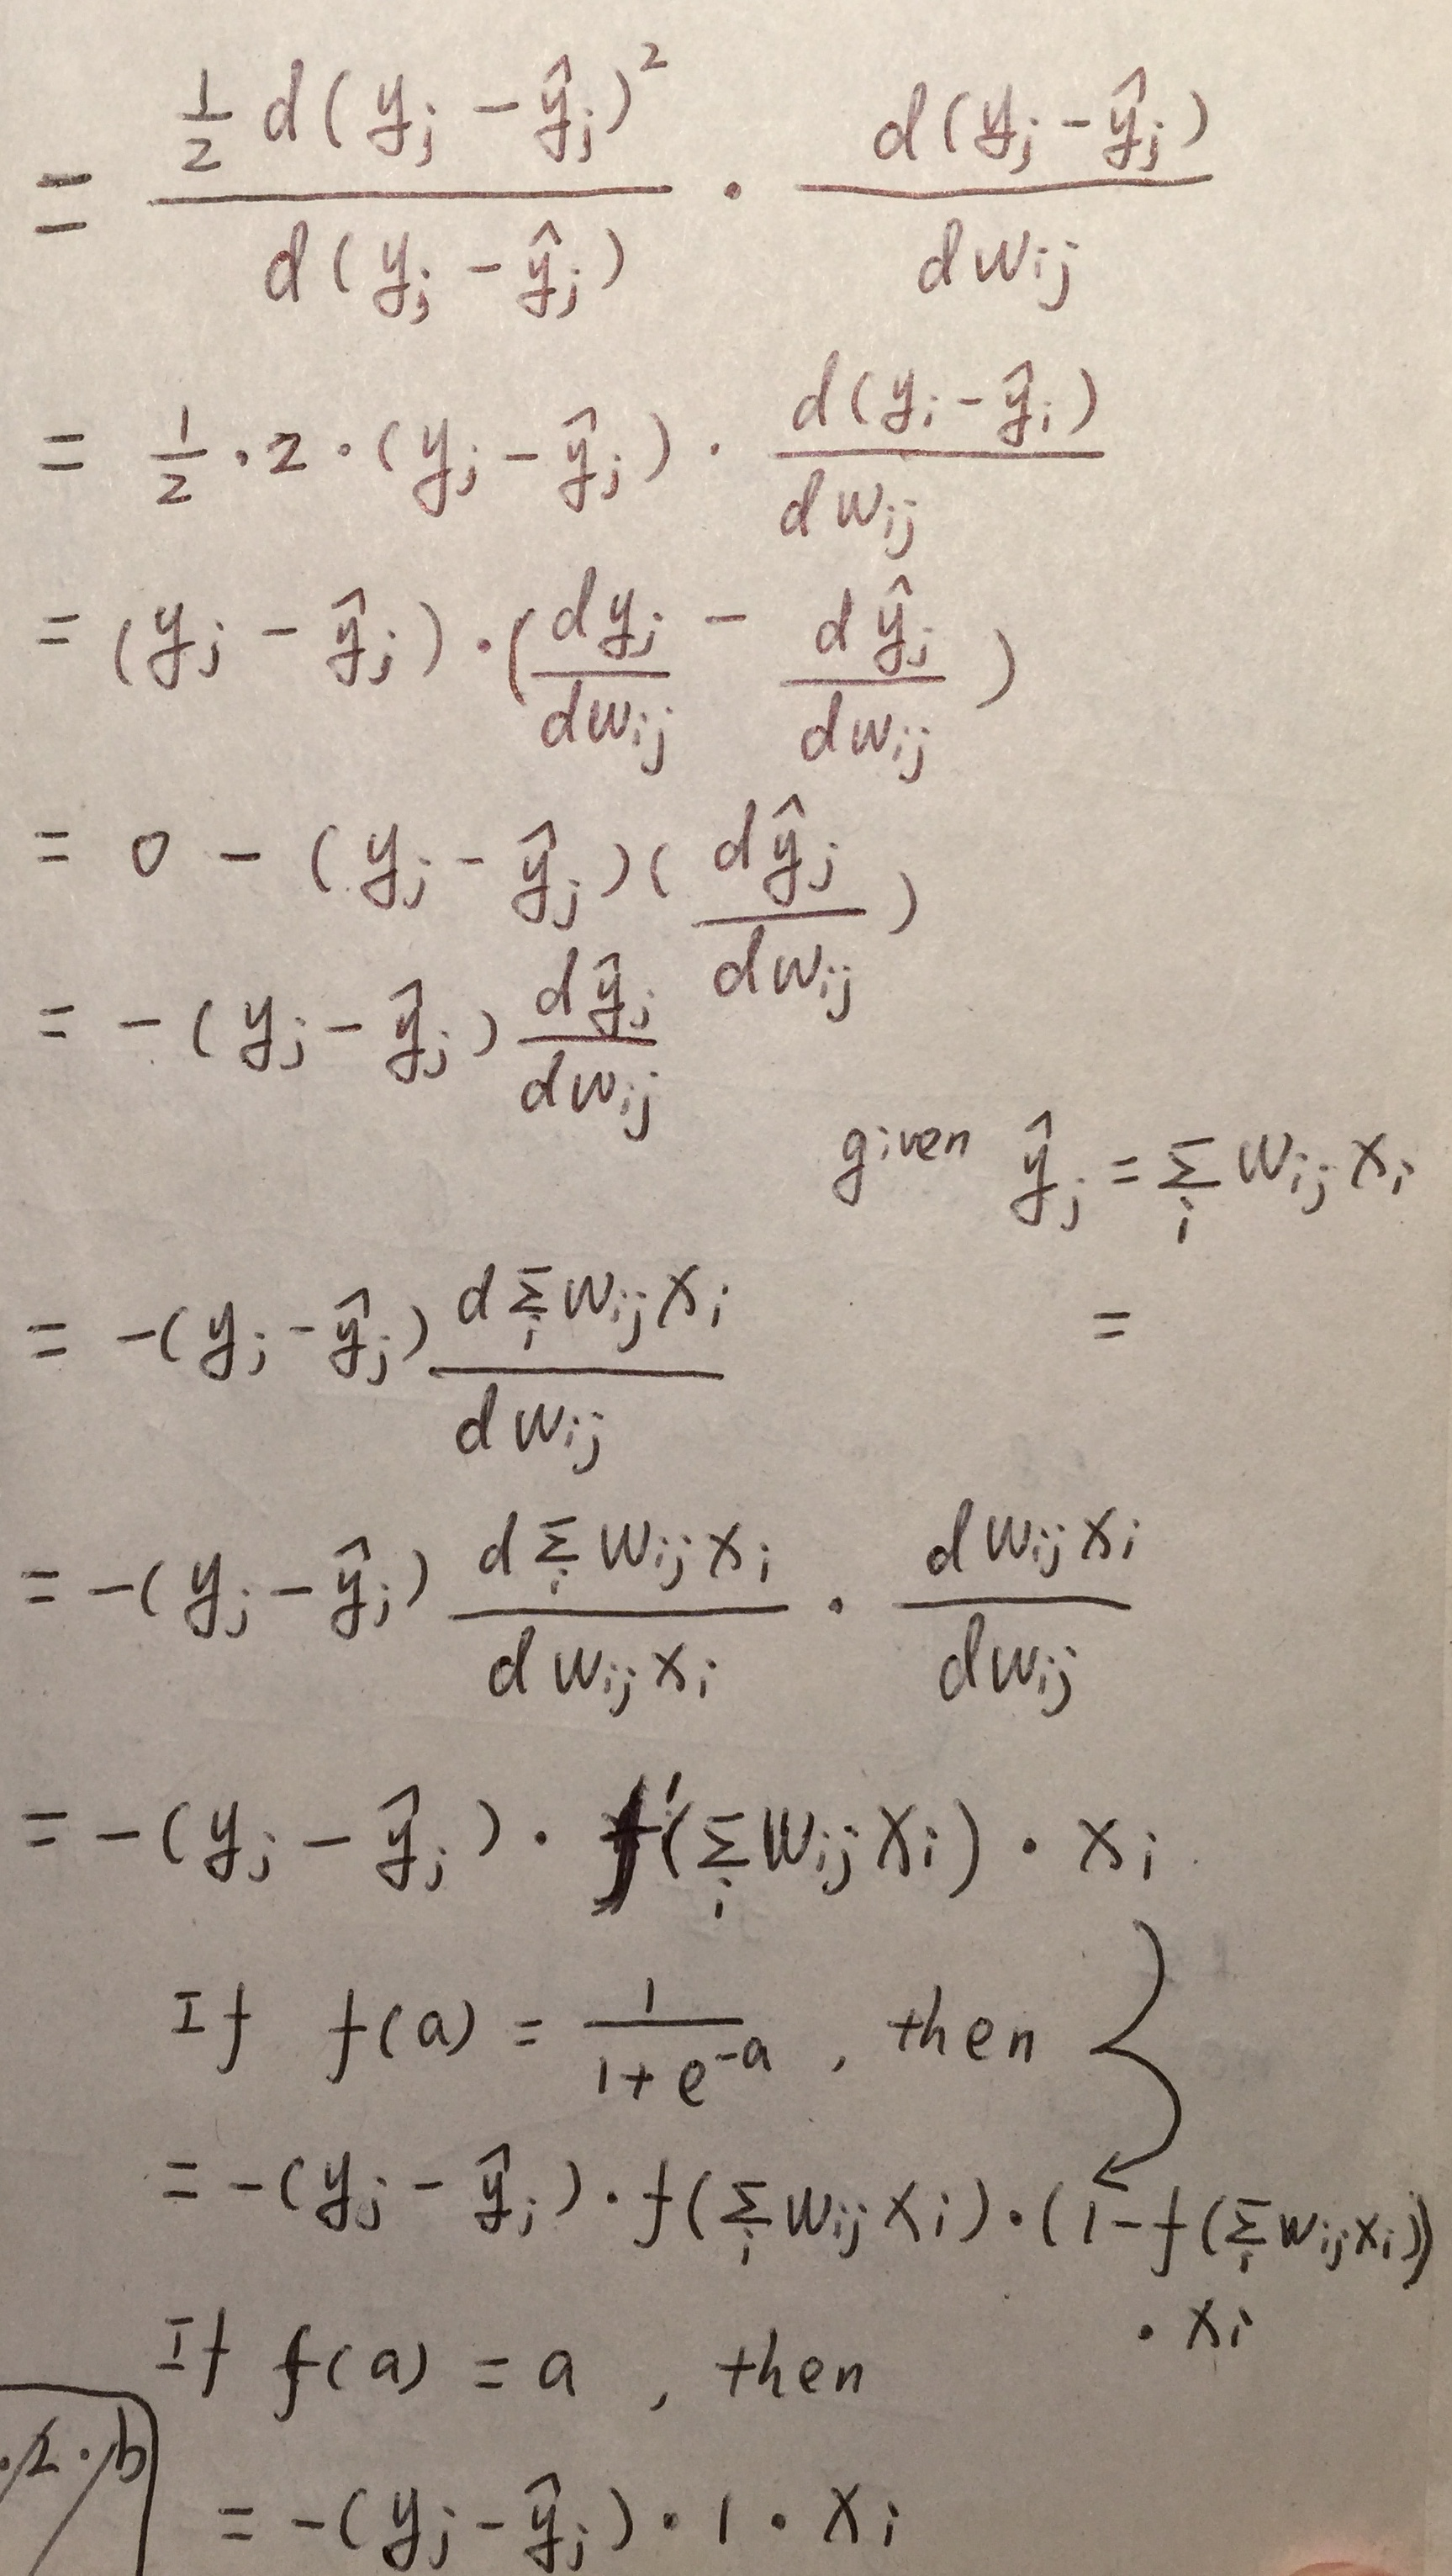

In [1]:
from IPython.display import Image
Image(data="/Users/Natsume/Desktop/derivativeE.jpg", width=400, height=800)

----
> By now, $\Delta{w_{i,j}} \approx \frac{dE}{dw_{i,j}} = -(y_j - \hat{y_j}) * \frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i} * x_i$, then $\delta = -(y_j - \hat{y_j}) * \frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i}$ is introduced to simplify the equation as $\Delta{w_{i,j}} \approx \delta * x_i$

----
> Of course, I agree $\frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i}$ looks a lot scarier than the other parts now. We can simplify it by taking two examples of $f(a)$: 
- example1: if the activation function f(a) is a sigmoid function, $f(a) = \frac{1}{1+e^{-a}}$ then $\frac{df(a)}{da} = f(a)*(1 - f(a))$. Now $$\Delta{w_{i,j}} \approx \frac{dE}{dw_{i,j}} = -(y_j - \hat{y_j}) * \frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i} * x_i$$
$$= -(y_j - \hat{y_j}) * f(\sum_{i=0}^n w_{i,j}x_i)*(1-f(\sum_{i=0}^n w_{i,j}x_i)) * x_i$$
- node error of example1 is $$\delta = -(y_j - \hat{y_j}) * f(\sum_{i=0}^n w_{i,j}x_i)*(1-f(\sum_{i=0}^n w_{i,j} * x_i))$$
- example2: if the activation function f(a) is $f(a) = a$, then $\frac{df(a)}{da} = 1$, Now $$\Delta{w_{i,j}} \approx \frac{dE}{dw_{i,j}} = -(y_j - \hat{y_j}) * \frac{d*f(\sum_{i=0}^n w_{i,j}x_i)}{d\sum_{i=0}^n w_{i,j}x_i} * x_i$$
- node error of example2 is $$\delta = -(y_j - \hat{y_j}) * 1$$

----
> Now let's update weights with another two examples: 
Example1: a network of 2-nodes input layer and 1-node output layer with activation function $f(a) = a$, no hidden layer
- error of output node1 = $\delta_{output1} = -(y_j - \hat{y_j}) * 1$
- updated weight from input node1 to output node1: $w_{input1,output1} = w_{input1,output1} + \Delta{w_{input1, output1}}= w_{input1,output1} + \delta_{output1} * x_{input1} * \eta$, Note: $\eta$ is a parameter you set to control how big a step the weight update itself
- similarity for updating weight from input node2 to output node1: $w_{input2,output1} = w_{input2,output1} + \Delta{w_{input2, output1}}= w_{input2,output1} + \delta_{output1} * x_{input2} * \eta$, Note: $\eta$ is a parameter you set to control how big a step the weight update itself

----
> Example2: a network of 3-nodes input layer and 1-node output layer with activation function $f(a) = \frac{1}{1+e^(-a)}$, a hidden layer with 2 nodes
- error of output node1 = $\delta_{output1} = -(y_j - \hat{y_j}) * f(\sum_{i=0}^n w_{i,j}x_i)*(1-f(\sum_{i=0}^n w_{i,j}$
- updated weight from hidden node1 to output node1: $w_{hidden1,output1} = w_{hidden1,output1} + \Delta{w_{hidden1, output1}}= w_{hidden1,output1} + \delta_{output1} * x_{hidden1} * \eta$
>----
- another prior knowledge given to calculate error of hidden node1 ([dlnd backprop](https://classroom.udacity.com/nanodegrees/nd101/parts/2a9dba0b-28eb-4b0e-acfa-bdcf35680d90/modules/329a736b-1700-43d4-9bf0-753cc461bebc/lessons/dc37fa92-75fd-4d41-b23e-9659dde80866/concepts/87d85ff2-db15-438b-9be8-d097ea917f1e), [ng backprop](https://youtu.be/SvAEX5taVKk?t=460): $$\delta_{hidden1} = \sum (w_{input1,hidden1} * \delta_{output1}) * f(a) * (1 - f(a))$$ given $a = \sum_{i=1}^3 w_{input_i,hidden1}x_i$ 
- updated weight from input node1 to hidden node1: $w_{input1, hidden1} = w_{input1, , hidden1} + \Delta{w_{input1, hidden1}}= w_{input1, hidden1} + \delta_{hidden1} * x_{input1} * \eta$
- updated weight from input node2 to hidden node1: $w_{input2, hidden1} = w_{input2,hidden1} + \Delta{w_{input2, hidden1}}= w_{input2, hidden1} + \delta_{hidden1} * x_{input2} * \eta$
- Note: In project 1 problem: $\delta{hidden1} = \sum (w_{input1,hidden1} * \delta_{output1})$ and hidden1_gradient = $f(a) * (1 - f(a))$, and therefore $w_{input2, hidden1} = w_{input2, hidden1} + \eta * x_{input2} * \delta_{hidden1} *$ hidden1_gradient  

----
> Now we know how backward pass update weights (given you already know forward pass), let's see what means to train a neural network (3-nodes input, 2-nodes hidden, 1-node output), here is one way of doing it:
- say, we have a dataset with 3 data points, the first data point is $(x_1^1, x_2^1, x_3^1, y^1)$, second is $(x_1^2, x_2^2, x_3^2, y^2)$ and so on
- and we initialize a weight matrix to match between input layer and hidden layer $[[w_{1,1}^1, w_{2,1}^1, w_{3,1}^1], [w_{1,2}^1, w_{2,2}^1, w_{3,2}^1]$, and a weight vector to match between hidden layer and output layer $[w_{1,1}^2, w_{2,1}^2]$
- then, we use $(x_1^1, x_2^1, x_3^1, y^1)$ go through forward pass by using operations like dot.product and activation functions, and get prediction and SSE  
- start backward pass with the same $(x_1^1, x_2^1, x_3^1, y^1)$ to calculate everything as we discussed above all the way to the input layer. 
- By now, all weights from hidden to output layer and from input to hidden layer have been updated once
- then we repeat this process using the second data point $(x_1^2, x_2^2, x_3^2, y^2)$, and third and until all data points have been used
- finally we iterate the whole process above for 1000 times or more as long as you have enough time and computing power. 
- Then, our neural network training is finished.

----
Right now, I am a lot more confident to say that I understand backprogation a little better. I am sure there are a lot of errors above, please help me correct my understanding and any error or inappropriate use of math above. 

Thanks a lot!